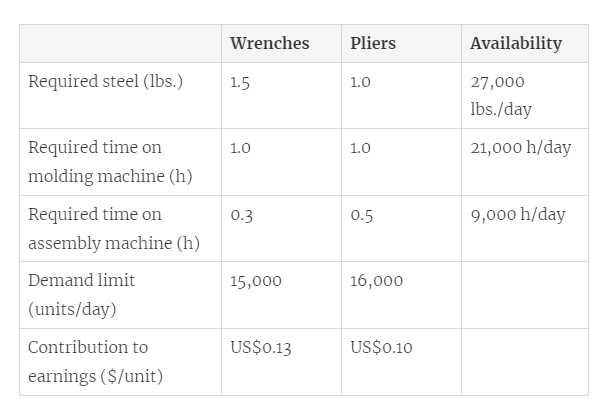

In [8]:
from IPython.display import Image

def display_image(image_path):
    try:
        return Image(filename=image_path)
    except Exception as e:
        print(f"An error occurred: {e}")

display_image(r"C:\Users\harry\Pictures\Gemstone.png")


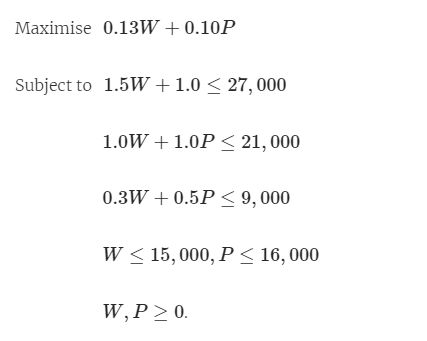

In [9]:
from IPython.display import Image

def display_image(image_path):
    try:
        return Image(filename=image_path)
    except Exception as e:
        print(f"An error occurred: {e}")

display_image(r"C:\Users\harry\Pictures\Gesmtone Equation.png")


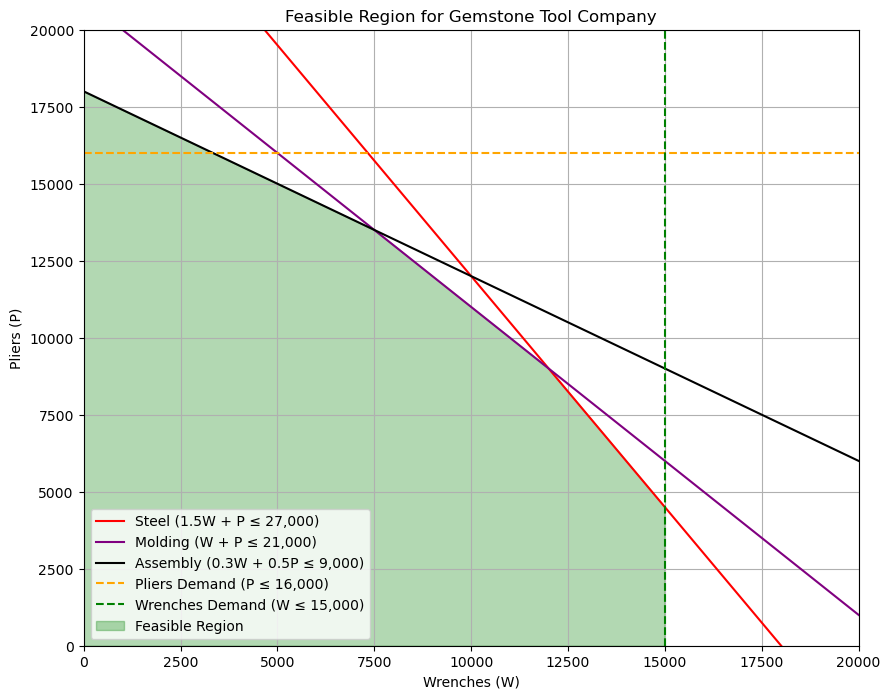

In [3]:
# Define the range for W (wrenches)
W = np.linspace(0, 20000, 400)

# Define the constraints
P_steel = (27000 - 1.5 * W) / 1.0  # Steel constraint
P_molding = (21000 - 1.0 * W) / 1.0       # Molding machine time constraint
P_assembly = (9000 - 0.3 * W) / 0.5 # Assembly machine time constraint

# Create the plot
plt.figure(figsize=(10, 8))

# Plot each constraint line
plt.plot(W, P_steel, label='Steel (1.5W + P ≤ 27,000)', color='red')
plt.plot(W, P_molding, label='Molding (W + P ≤ 21,000)', color='purple')
plt.plot(W, P_assembly, label='Assembly (0.3W + 0.5P ≤ 9,000)', color='black')

# Add the demand constraints as horizontal and vertical lines
plt.axhline(y=16000, color='orange', linestyle='--', label='Pliers Demand (P ≤ 16,000)')
plt.axvline(x=15000, color='green', linestyle='--', label='Wrenches Demand (W ≤ 15,000)')

# Highlight the feasible region
plt.fill_between(W, 0, np.minimum(np.minimum(P_steel, P_molding), P_assembly), 
                 where=(W <= 15000), color='green', alpha=0.3, label='Feasible Region')

# Set the plot limits
plt.xlim(0, 20000)
plt.ylim(0, 20000)

# Add labels and legend
plt.xlabel('Wrenches (W)')
plt.ylabel('Pliers (P)')
plt.title('Feasible Region for Gemstone Tool Company')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [12]:
from scipy.optimize import linprog
# same result with excel

# Coefficients of the objective function for maximization (note the negative sign for minimization conversion)
c = [-0.13, -0.10]

# Inequality constraints (left-hand side)
A = [
    [1.5, 1],
    [1, 1],
    [0.3, 0.5]
]

# Inequality constraints (right-hand side)
b = [27000, 21000, 9000]

# Bounds for the decision variables W and P
bounds = [(0, 15000), (0, 16000)]

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Check if the optimization was successful
if res.success:
    # Optimal values for W and P
    W_optimal, P_optimal = res.x
    # The maximum profit (change the sign because the result of linprog is a minimization)
    max_profit = -(res.fun)
    print(f"Optimal number of wrenches to produce (W): {W_optimal}")
    print(f"Optimal number of pliers to produce (P): {P_optimal}")
    print(f"Maximum profit: ${max_profit}")
else:
    print("Optimization was not successful.")

Optimal number of wrenches to produce (W): 12000.0
Optimal number of pliers to produce (P): 8999.999999999998
Maximum profit: $2460.0


In [10]:
import numpy as np

# Coefficients matrix for the binding constraints
A = np.array([[1.5, 1], [1, 1]])

# Constants on the right-hand side of the binding constraints
b = np.array([27000, 21000])

# Solve the system of linear equations for W and P
optimal_solution = np.linalg.solve(A, b)

W_optimal = optimal_solution[0]  # The optimal number of wrenches
P_optimal = optimal_solution[1]  # The optimal number of pliers

W_optimal, P_optimal

(12000.0, 8999.999999999998)

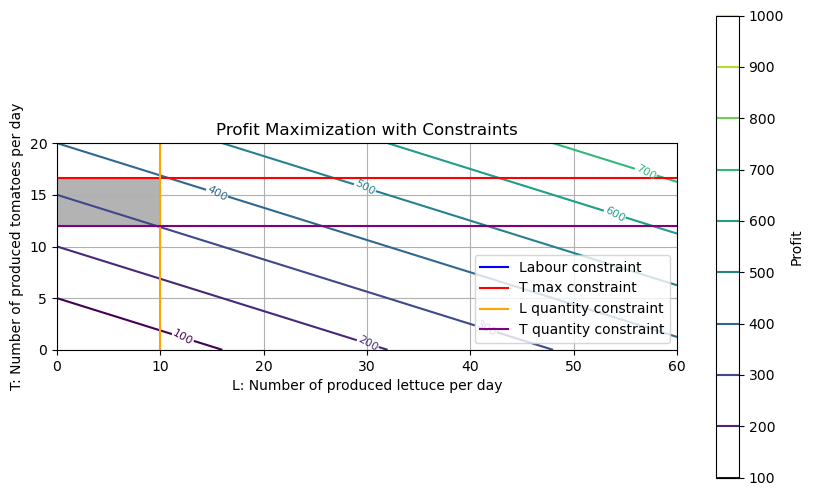

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for L and T
L = np.linspace(0, 60, 400)
T = np.linspace(0, 20, 400)

# Create meshgrid for L and T
L, T = np.meshgrid(L, T)

# Profit function
Profit = 6.25 * L + 20 * T

# Constraints
LabourConstraint = 0.25 * L + 0.17 * T <= 28
LMaxConstraint = L <= 50
TMaxConstraint = T <= 50 / 3
LQuantityConstraint = L <= 10
TQuantityConstraint = T >= 12
NonNegativeConstraintL = L >= 0
NonNegativeConstraintT = T >= 0

# Apply constraints
FeasibleRegion = LabourConstraint & LMaxConstraint & TMaxConstraint & LQuantityConstraint & TQuantityConstraint & NonNegativeConstraintL & NonNegativeConstraintT

# Plotting
plt.figure(figsize=(10, 6))

# Plot profit lines
CS = plt.contour(L, T, Profit, levels=range(100, 1001, 100), cmap='viridis')
plt.clabel(CS, inline=True, fontsize=8)

# Highlight the feasible region
plt.imshow(FeasibleRegion, extent=(0, 60, 0, 20), origin='lower', cmap='Greys', alpha=0.3)

# Labeling the plot
plt.title('Profit Maximization with Constraints')
plt.xlabel('L: Number of produced lettuce per day')
plt.ylabel('T: Number of produced tomatoes per day')
plt.colorbar(CS, label='Profit')

# Plot constraints
plt.plot([0, 112], [28/0.17, 0], 'b-', label='Labour constraint')
plt.axhline(y=50/3, color='r', linestyle='-', label='T max constraint')
plt.axvline(x=10, color='orange', linestyle='-', label='L quantity constraint')
plt.axhline(y=12, color='purple', linestyle='-', label='T quantity constraint')

plt.xlim(0, 60)
plt.ylim(0, 20)
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from scipy.optimize import linprog

# Coefficients of the objective function (negated for maximization)
c = [-6.25, -20]  # Profit function coefficients negated

# Coefficients for the inequality constraints (Ax <= b)
A = [[0.25, 0.17],  # Labour constraint
     [-1, 0],       # -L <= -50 (converted to L <= 50)
     [0, -1],       # -T <= -(50/3) (converted to T <= 50/3)
     [-1, 0],       # -L <= -10 (converted to L <= 10)
     [0, 1]]        # T >= 12

b = [28,           # Labour constraint
     -50,          # L max constraint
     -(50/3),      # T max constraint
     -10,          # L quantity constraint
     12]           # T quantity constraint

# Bounds for each variable
x0_bounds = (0, None)  # L >= 0
x1_bounds = (0, None)  # T >= 0

# Solve the problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Print the results
if result.success:
    optimal_L = result.x[0]
    optimal_T = result.x[1]
    optimal_profit = -result.fun  # Negate the result to get the profit
    print(f"Optimal L (lettuce): {optimal_L}")
    print(f"Optimal T (tomatoes): {optimal_T}")
    print(f"Maximum Profit: ${optimal_profit}")
else:
    print("Optimization was not successful. Here's the error message:")
    print(result.message)


Optimization was not successful. Here's the error message:
The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
